### 2) 시그모이드 함수(Sigmoid function)

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

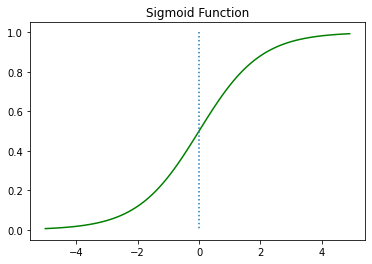

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

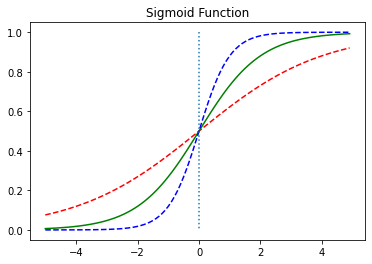

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

### 4) 파이토치로 로지스틱 회귀 구현하기

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
torch.manual_seed(1)

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [ ]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [ ]:
print(x_train)
print(y_train)

tensor([[1., 2.],
        [2., 3.],
        [3., 1.],
        [4., 3.],
        [5., 3.],
        [6., 2.]])
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [ ]:
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [ ]:
hypothesis = 1 / (1+torch.exp(-(x_train.matmul(W)+b)))

In [ ]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [ ]:
hypothesis = torch.sigmoid(x_train.matmul(W)+b)

In [ ]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)


In [ ]:
-(y_train[0] * torch.log(hypothesis[0]) + 
  (1 - y_train[0]) * torch.log(1 - hypothesis[0]))

tensor([0.6931], grad_fn=<NegBackward>)

In [ ]:
losses = -(y_train * torch.log(hypothesis) + 
           (1 - y_train) * torch.log(1 - hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward>)


In [ ]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


In [ ]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [ ]:
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W,b], lr=1)
num_epochs = 1000

for epoch in range(num_epochs + 1):
  hypothesis = torch.sigmoid(x_train.matmul(W) + b)
  cost = F.binary_cross_entropy(hypothesis, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, num_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031672
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [ ]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward>)


In [ ]:
pred = ypothesis >= torch.FloatTensor([0.5])
print(pred)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [ ]:
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)


### 2) nn.Module로 구현하는 로지스틱 회귀

In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [45]:
torch.manual_seed(1)

In [65]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [64]:
print(x_train)
print(y_train)

tensor([[1., 2.],
        [2., 3.],
        [3., 1.],
        [4., 3.],
        [5., 3.],
        [6., 2.]])
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [66]:
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

In [61]:
model(x_train)

tensor([[0.6620],
        [0.7082],
        [0.5054],
        [0.6447],
        [0.6107],
        [0.4862]], grad_fn=<SigmoidBackward>)

In [68]:
optimizer = optim.SGD(model.parameters(), lr=1)
num_epochs = 1000

for epoch in range(num_epochs + 1):
  hypothesis = model(x_train)
  loss_func = F.binary_cross_entropy(hypothesis, y_train)

  optimizer.zero_grad()
  loss_func.backward()
  optimizer.step()

  if epoch % 10 == 0:
    pred = hypothesis >= torch.FloatTensor([0.5])
    correct_pred = pred.float() == y_train
    accuracy = correct_pred.sum().item() / len(correct_pred)

    print('Epoch {:4d}/{} Loss: {:.6f} Accuracy:{:2.2f}'.format(
        epoch, num_epochs, loss_func.item(), accuracy*100))

Epoch    0/1000 Loss: 0.019832 Accuracy:100.00
Epoch   10/1000 Loss: 0.019650 Accuracy:100.00
Epoch   20/1000 Loss: 0.019471 Accuracy:100.00
Epoch   30/1000 Loss: 0.019295 Accuracy:100.00
Epoch   40/1000 Loss: 0.019122 Accuracy:100.00
Epoch   50/1000 Loss: 0.018953 Accuracy:100.00
Epoch   60/1000 Loss: 0.018786 Accuracy:100.00
Epoch   70/1000 Loss: 0.018622 Accuracy:100.00
Epoch   80/1000 Loss: 0.018461 Accuracy:100.00
Epoch   90/1000 Loss: 0.018303 Accuracy:100.00
Epoch  100/1000 Loss: 0.018148 Accuracy:100.00
Epoch  110/1000 Loss: 0.017995 Accuracy:100.00
Epoch  120/1000 Loss: 0.017845 Accuracy:100.00
Epoch  130/1000 Loss: 0.017697 Accuracy:100.00
Epoch  140/1000 Loss: 0.017552 Accuracy:100.00
Epoch  150/1000 Loss: 0.017409 Accuracy:100.00
Epoch  160/1000 Loss: 0.017269 Accuracy:100.00
Epoch  170/1000 Loss: 0.017130 Accuracy:100.00
Epoch  180/1000 Loss: 0.016994 Accuracy:100.00
Epoch  190/1000 Loss: 0.016860 Accuracy:100.00
Epoch  200/1000 Loss: 0.016729 Accuracy:100.00
Epoch  210/10

In [69]:
model(x_train)

tensor([[5.4353e-05],
        [1.6836e-02],
        [2.0149e-02],
        [9.7645e-01],
        [9.9951e-01],
        [9.9994e-01]], grad_fn=<SigmoidBackward>)

In [70]:
print(list(model.parameters()))

[Parameter containing:
tensor([[3.8961, 1.8565]], requires_grad=True), Parameter containing:
tensor([-17.4292], requires_grad=True)]


### 3) 클래스로 파이토치 모델 구현하기

In [71]:
class BinaryClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2, 1)
    self.sigmoid = nn.Sigmoid()
  
  def forward(self, x):
    return self.sigmoid(self.linear(x))

In [73]:
torch.manual_seed(1)

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [74]:
model = BinaryClassifier()

In [75]:
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614853 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00